In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [ ]:
# TODO : Import the Data from the kaggle API

In [2]:

from google.colab import files

# This will prompt you to upload the kaggle.json file
uploaded = files.upload()

# Step 3: Create the Kaggle directory and move the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Step 4: Set the permissions for the Kaggle API token
!chmod 600 ~/.kaggle/kaggle.json

# Step 5: Download the dataset using the Kaggle API
# The command format is: kaggle datasets download -d <dataset-owner>/<dataset-name>
# Replace with the specific dataset path from Kaggle

!kaggle datasets download -d umutberkekoc/ab-test-example

# Step 6: Unzip the downloaded file
!unzip ab-test-example.zip


Saving kaggle.json to kaggle (1).json
403 - Forbidden - Permission 'datasets.get' was denied
unzip:  cannot find or open ab-test-example.zip, ab-test-example.zip.zip or ab-test-example.zip.ZIP.


WHY DID I GET THIS ERROR?

In [3]:
# Step 1: Import necessary libraries
import pandas as pd  # Pandas for data manipulation
import numpy as np   # Numpy for numerical operations (optional)

# Step 2: Load the local CSV file into a DataFrame
file_path = "/content/AB_Test_Results_Challenge.csv"  # Local file path
data = pd.read_csv(file_path)  # Read the CSV file

# Step 3: Display the first 5 rows
data.head()  # Show the first few rows of the dataset

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


# Data Understanding

In [4]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID
# 1. DataFrame Information
print("### DataFrame Information ###")
data.info()  # Provides information about data types, non-null counts, memory usage

# 2. Columns in the DataFrame
print("\n### Columns in DataFrame ###")
print(data.columns)  # Displays the list of column names in the DataFrame

# 3. Counting Missing Values
print("\n### Counting Missing Values ###")
print(data.isnull().sum())  # Counts the number of missing values in each column

# 4. Descriptive Statistics
print("\n### Descriptive Statistics ###")
print(data.describe())  # Provides descriptive statistics like mean, median, etc., for numerical columns

# 5. Value Counts for 'VARIANT_NAME'
print("\n### Value Counts for VARIANT_NAME ###")
print(data['VARIANT_NAME'].value_counts())  # Shows the count of unique values in 'VARIANT_NAME' column

# 6. Counting Unique Users in 'USER_ID'
print("\n### Counting Unique Users in USER_ID ###")
unique_users = data['USER_ID'].nunique()  # Count of unique USER_ID values
print(f"Number of unique users: {unique_users}")

### DataFrame Information ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB

### Columns in DataFrame ###
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

### Counting Missing Values ###
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

### Descriptive Statistics ###
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000

### Value Counts for VARIANT_NAME ###
VARIANT_NAME
va

My conclusion - some users must be duplicated across the two groups.

# Average Revenue by VARIANT_NAME

In [6]:
#TODO

# Step 2: Group by 'VARIANT_NAME' and calculate average revenue
# Assuming the revenue column is named 'Revenue' (adjust if the column name is different)
average_revenue = data.groupby('VARIANT_NAME')['REVENUE'].mean()

# Step 3: Display the results
print("\n### Average Revenue by VARIANT_NAME ###")
print(average_revenue)


### Average Revenue by VARIANT_NAME ###
VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [8]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?
# Import the necessary library for the Shapiro-Wilk test
from scipy.stats import shapiro

# Step 1: Separate the data into two groups: control and variant
control_group = data[data['VARIANT_NAME'] == 'control']['REVENUE']  # Revenue data for control group
variant_group = data[data['VARIANT_NAME'] == 'variant']['REVENUE']  # Revenue data for variant group

# Step 2: Perform the Shapiro-Wilk test for the control group
stat_control, p_control = shapiro(control_group)
print(f"Control Group: Test Statistic = {stat_control}, p-value = {p_control}")

# Step 3: Perform the Shapiro-Wilk test for the variant group
stat_variant, p_variant = shapiro(variant_group)
print(f"Variant Group: Test Statistic = {stat_variant}, p-value = {p_variant}")

# Step 4: Interpretation based on p-values
if p_control < 0.05:
    print("Conclusion for Control Group: The null hypothesis is rejected. The revenue data is not normally distributed.")
else:
    print("Conclusion for Control Group: The null hypothesis is not rejected. The revenue data is normally distributed.")

if p_variant < 0.05:
    print("Conclusion for Variant Group: The null hypothesis is rejected. The revenue data is not normally distributed.")
else:
    print("Conclusion for Variant Group: The null hypothesis is not rejected. The revenue data is normally distributed.")


Control Group: Test Statistic = 0.01833147442513483, p-value = 2.4983285100057203e-95
Variant Group: Test Statistic = 0.027033073451830147, p-value = 2.7310104028899288e-95
Conclusion for Control Group: The null hypothesis is rejected. The revenue data is not normally distributed.
Conclusion for Variant Group: The null hypothesis is rejected. The revenue data is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?
# Import the necessary library for Levene's test
from scipy.stats import levene

# Step 1: Separate the revenue data into two groups: control and variant
control_group = data[data['VARIANT_NAME'] == 'control']['REVENUE']  # Revenue data for control group
variant_group = data[data['VARIANT_NAME'] == 'variant']['REVENUE']  # Revenue data for variant group

# Step 2: Perform Levene's Test for homogeneity of variances
stat, p_value = levene(control_group, variant_group)
print(f"Levene's Test Statistic = {stat}, p-value = {p_value}")

# Step 3: Interpret the results
if p_value < 0.05:
    print("Conclusion: The null hypothesis is rejected. The variances are significantly different between the two groups (not homogeneous).")
else:
    print("Conclusion: The null hypothesis is not rejected. The variances are not significantly different (homogeneous).")


Levene's Test Statistic = 1.6158565214488871, p-value = 0.2037000785338918
Conclusion: The null hypothesis is not rejected. The variances are not significantly different (homogeneous).


# Non-Parametric Test (mannwhitneyu Test)

In [ ]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

In [12]:
# Import the necessary library for Mann-Whitney U test
from scipy.stats import mannwhitneyu

# Step 1: Separate the revenue data into two groups: control and variant
control_group = data[data['VARIANT_NAME'] == 'control']['REVENUE']  # Revenue data for control group
variant_group = data[data['VARIANT_NAME'] == 'variant']['REVENUE']  # Revenue data for variant group

# Step 2: Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(control_group, variant_group, alternative='two-sided')

# Step 3: Display the results
print(f"Mann-Whitney U Test Statistic = {stat}, p-value = {p_value}")

# Step 4: Interpretation based on p-value
if p_value < 0.05:
    print("Conclusion: The null hypothesis is rejected. There is a significant difference in revenue distributions between the control and variant groups.")
else:
    print("Conclusion: The null hypothesis is not rejected. There is no significant difference in revenue distributions between the control and variant groups.")


Mann-Whitney U Test Statistic = 12521564.0, p-value = 0.47825247965294926
Conclusion: The null hypothesis is not rejected. There is no significant difference in revenue distributions between the control and variant groups.


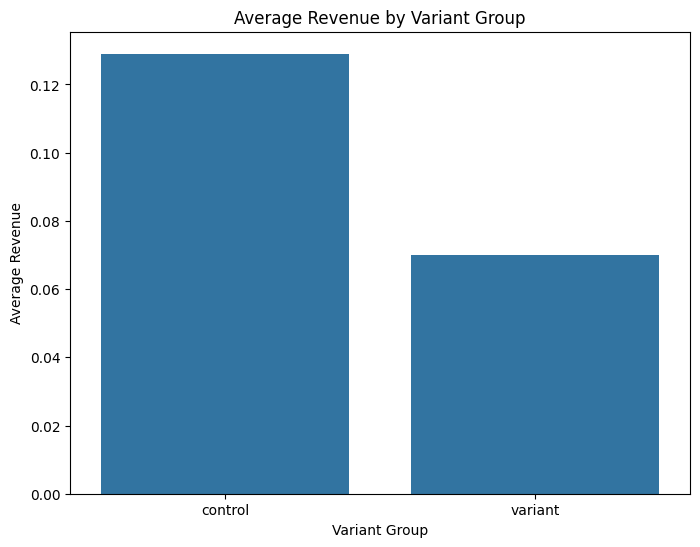

In [16]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the average revenue for each variant group
average_revenue_df = data.groupby('VARIANT_NAME', as_index=False)['REVENUE'].mean()

# Step 2: Create a bar plot using seaborn (without the palette argument)
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x='VARIANT_NAME', y='REVENUE', data=average_revenue_df)

# Step 3: Add labels and title to the plot
plt.title('Average Revenue by Variant Group')
plt.xlabel('Variant Group')
plt.ylabel('Average Revenue')

plt.show()

